In [1]:
library(tidyverse)
library(RColorBrewer)
library(sf)
library(ggthemes)
library(ggrepel)
library(stringr)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE



In [ ]:
# library(fmsb)
# library(gridExtra)

In [2]:
options(repr.plot.width =15, repr.plot.height =10)

In [3]:
# constructor_results <- read_csv("constructor_results.csv", show_col_types = FALSE)
# constructor_standings <- read_csv("constructor_standings.csv", show_col_types = FALSE)
# constructors <- read_csv("constructors.csv", show_col_types = FALSE)
# driver_standings <- read_csv("driver_standings.csv", show_col_types = FALSE)
drivers <- read_csv("drivers.csv", show_col_types = FALSE)
# lap_times <- read_csv("lap_times.csv", show_col_types = FALSE)
# pit_stops <- read_csv("pit_stops.csv", show_col_types = FALSE)
# qualifying <- read_csv("qualifying.csv", show_col_types = FALSE)
races <- read_csv("races.csv", show_col_types = FALSE)
results <- read_csv("results.csv", show_col_types = FALSE)
# seasons <- read_csv("seasons.csv", show_col_types = FALSE)
# sprint_results <- read_csv("sprint_results.csv", show_col_types = FALSE)
# status <- read_csv("status.csv", show_col_types = FALSE)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”


In [11]:
driver_results <- results %>%
  left_join(races, by = "raceId") %>%
  left_join(drivers, by = "driverId") %>%
select(
    resultId,
    raceId,
    circuitId,
    circuit_name = name, # 'name' from races table
    year,
    date,
    position,
    positionOrder,
    points,
    driverId,
    driver_code = code,
    forename,
    surname,
    driverRef,
    milliseconds,
) %>% filter(year == 2024)

In [19]:
(driver_results)

resultId,raceId,circuitId,circuit_name,year,date,position,positionOrder,points,driverId,driver_code,forename,surname,driverRef,milliseconds
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
26286,1121,3,Bahrain Grand Prix,2024,2024-03-02,1,1,26,830,VER,Max,Verstappen,max_verstappen,5504742
26287,1121,3,Bahrain Grand Prix,2024,2024-03-02,2,2,18,815,PER,Sergio,Pérez,perez,5527199
26288,1121,3,Bahrain Grand Prix,2024,2024-03-02,3,3,15,832,SAI,Carlos,Sainz,sainz,5529852
26289,1121,3,Bahrain Grand Prix,2024,2024-03-02,4,4,12,844,LEC,Charles,Leclerc,leclerc,5544411
26290,1121,3,Bahrain Grand Prix,2024,2024-03-02,5,5,10,847,RUS,George,Russell,russell,5551530
26291,1121,3,Bahrain Grand Prix,2024,2024-03-02,6,6,8,846,NOR,Lando,Norris,norris,5553200
26292,1121,3,Bahrain Grand Prix,2024,2024-03-02,7,7,6,1,HAM,Lewis,Hamilton,hamilton,5555066
26293,1121,3,Bahrain Grand Prix,2024,2024-03-02,8,8,4,857,PIA,Oscar,Piastri,piastri,5560824
26294,1121,3,Bahrain Grand Prix,2024,2024-03-02,9,9,2,4,ALO,Fernando,Alonso,alonso,5579629


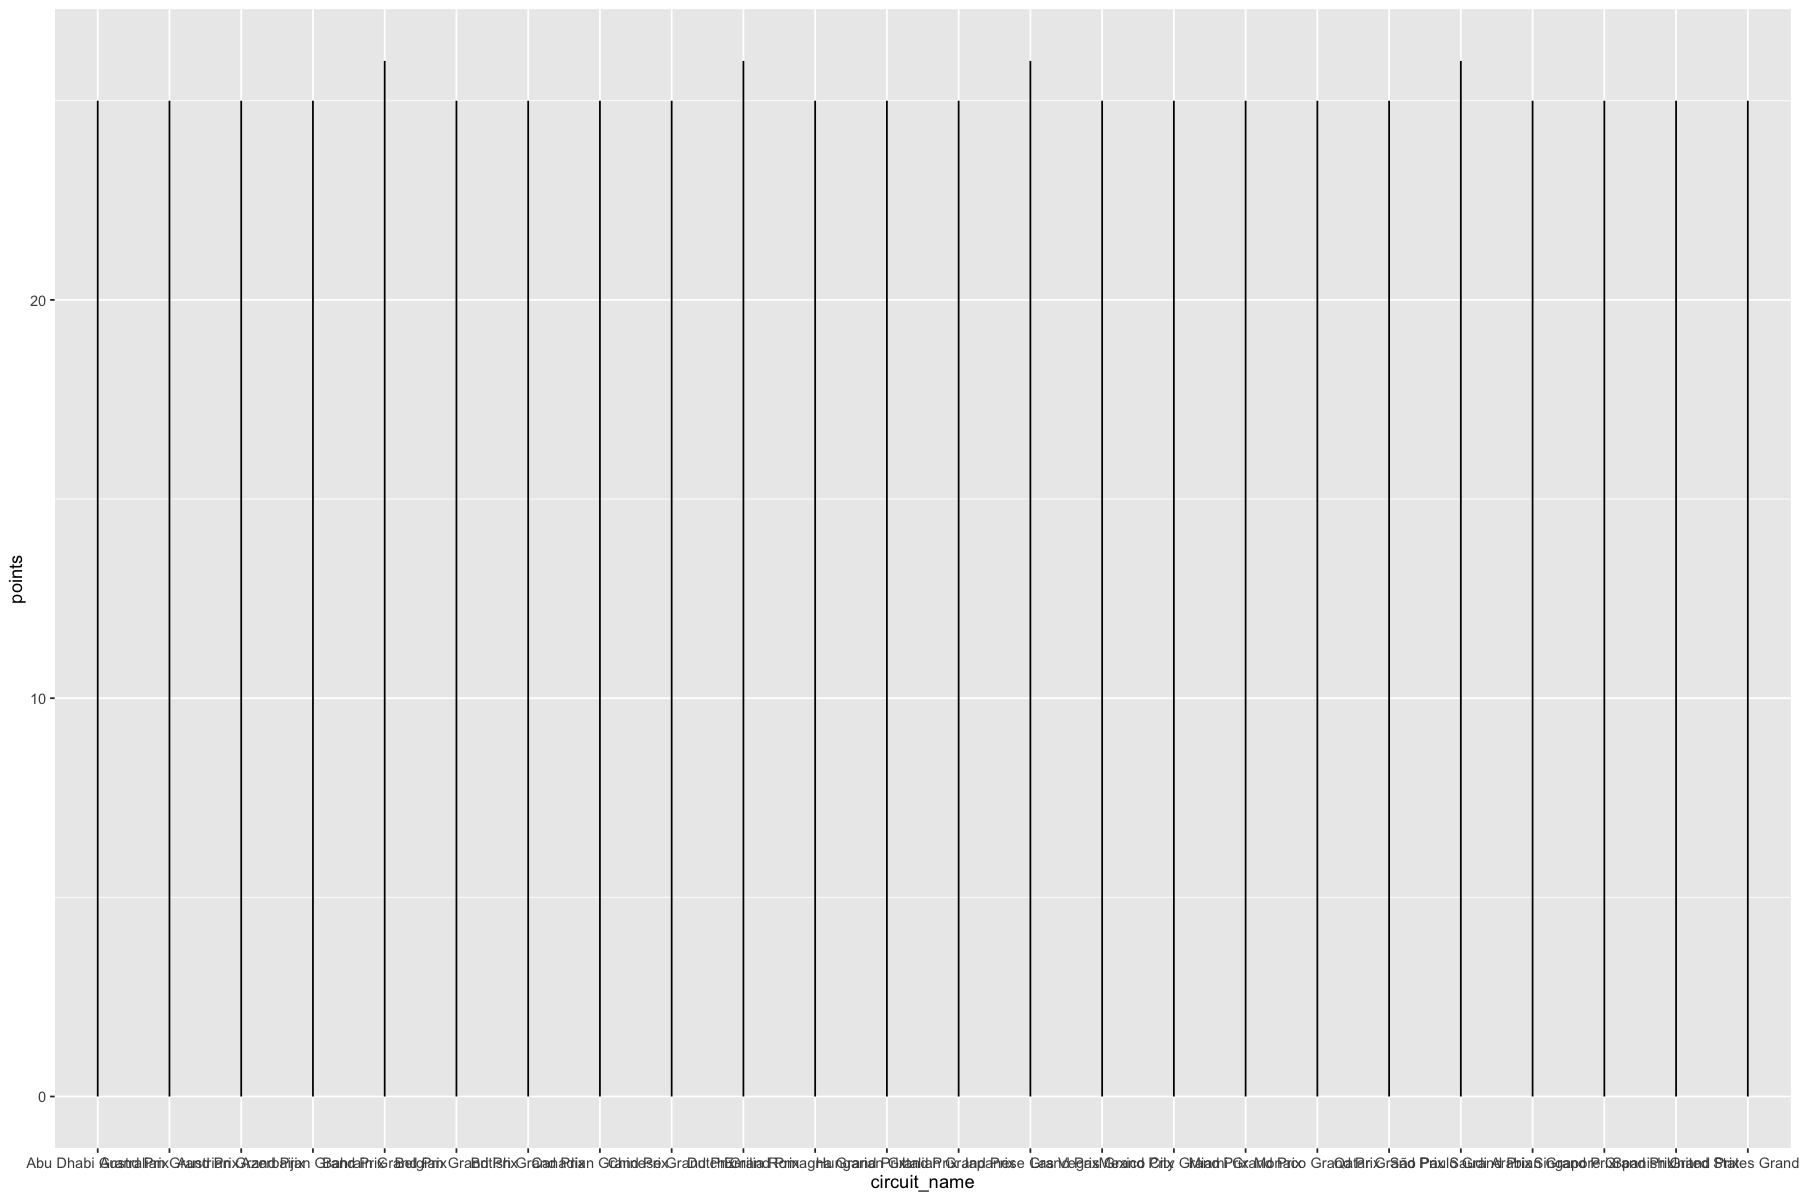

In [21]:
ggplot(driver_results, aes(x=circuit_name, y=points, fill=driverId)) + 
    geom_line()

In [23]:
area_plot <- ggplot(driver_results, aes(x = position, y = points)) +
  geom_area(fill = "#3498db", alpha = 0.7, color = "#2980b9", size = 1.2) +
  geom_point(size = 3, color = "#e74c3c") +
  geom_text(aes(label = driver_code), vjust = -0.5, fontface = "bold", size = 3.5) +
  scale_x_continuous(breaks = 1:10, labels = paste0("P", 1:10)) +
  scale_y_continuous(breaks = seq(0, 30, 5)) +
  labs(
    title = "2024 Bahrain Grand Prix - Points Distribution",
    subtitle = "Area plot showing F1 points awarded by finishing position",
    x = "Finishing Position",
    y = "Championship Points",
    caption = "Data: Formula 1 | March 2, 2024"
  ) +
  theme_fivethirtyeight() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "white"),
    plot.background = element_rect(fill = "white"),
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 12, face = "bold")
  )

# Display area plot
print(area_plot)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


ERROR: [1m[33mError[39m in `scale_x_continuous()`:[22m
[1m[22m[33m![39m Discrete values supplied to continuous scale.
[36mℹ[39m Example values: [34m"1"[39m, [34m"2"[39m, [34m"3"[39m, [34m"4"[39m, and [34m"5"[39m


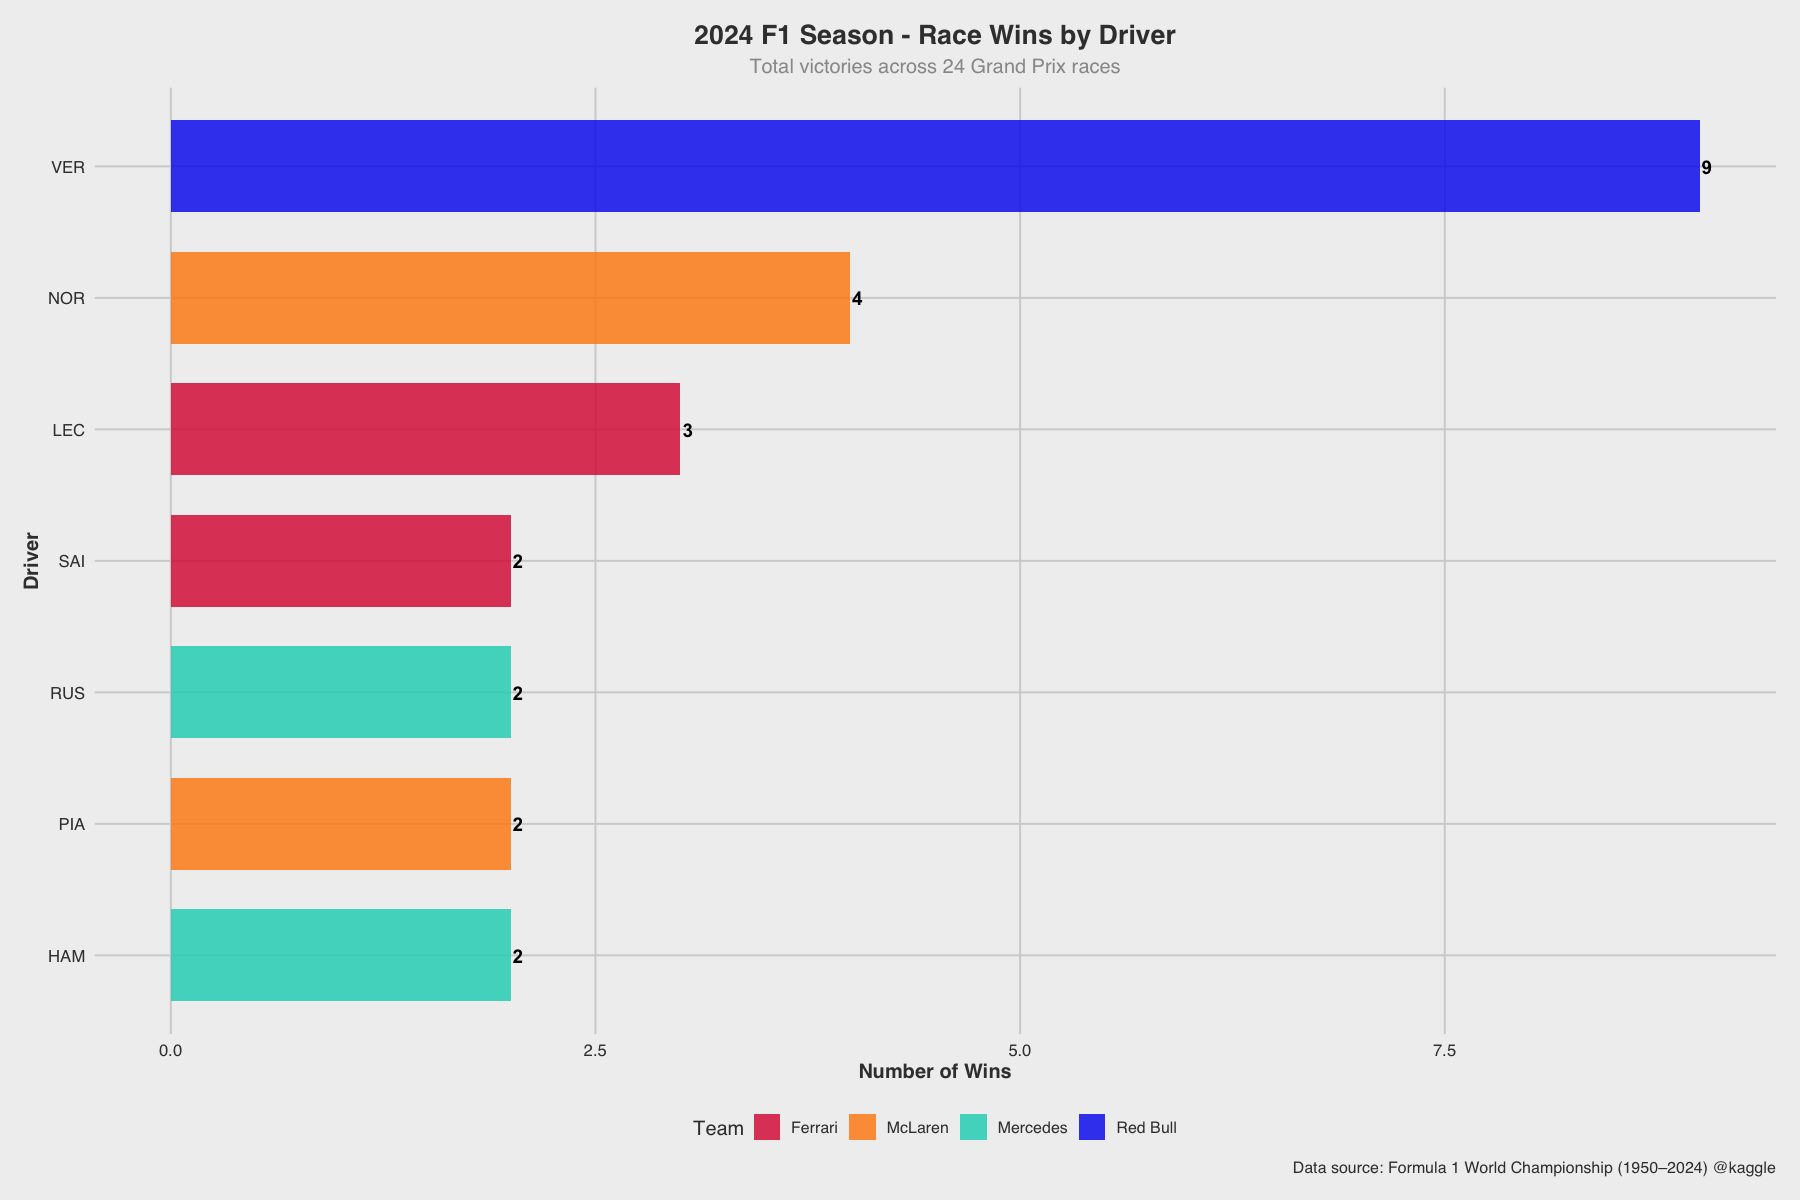

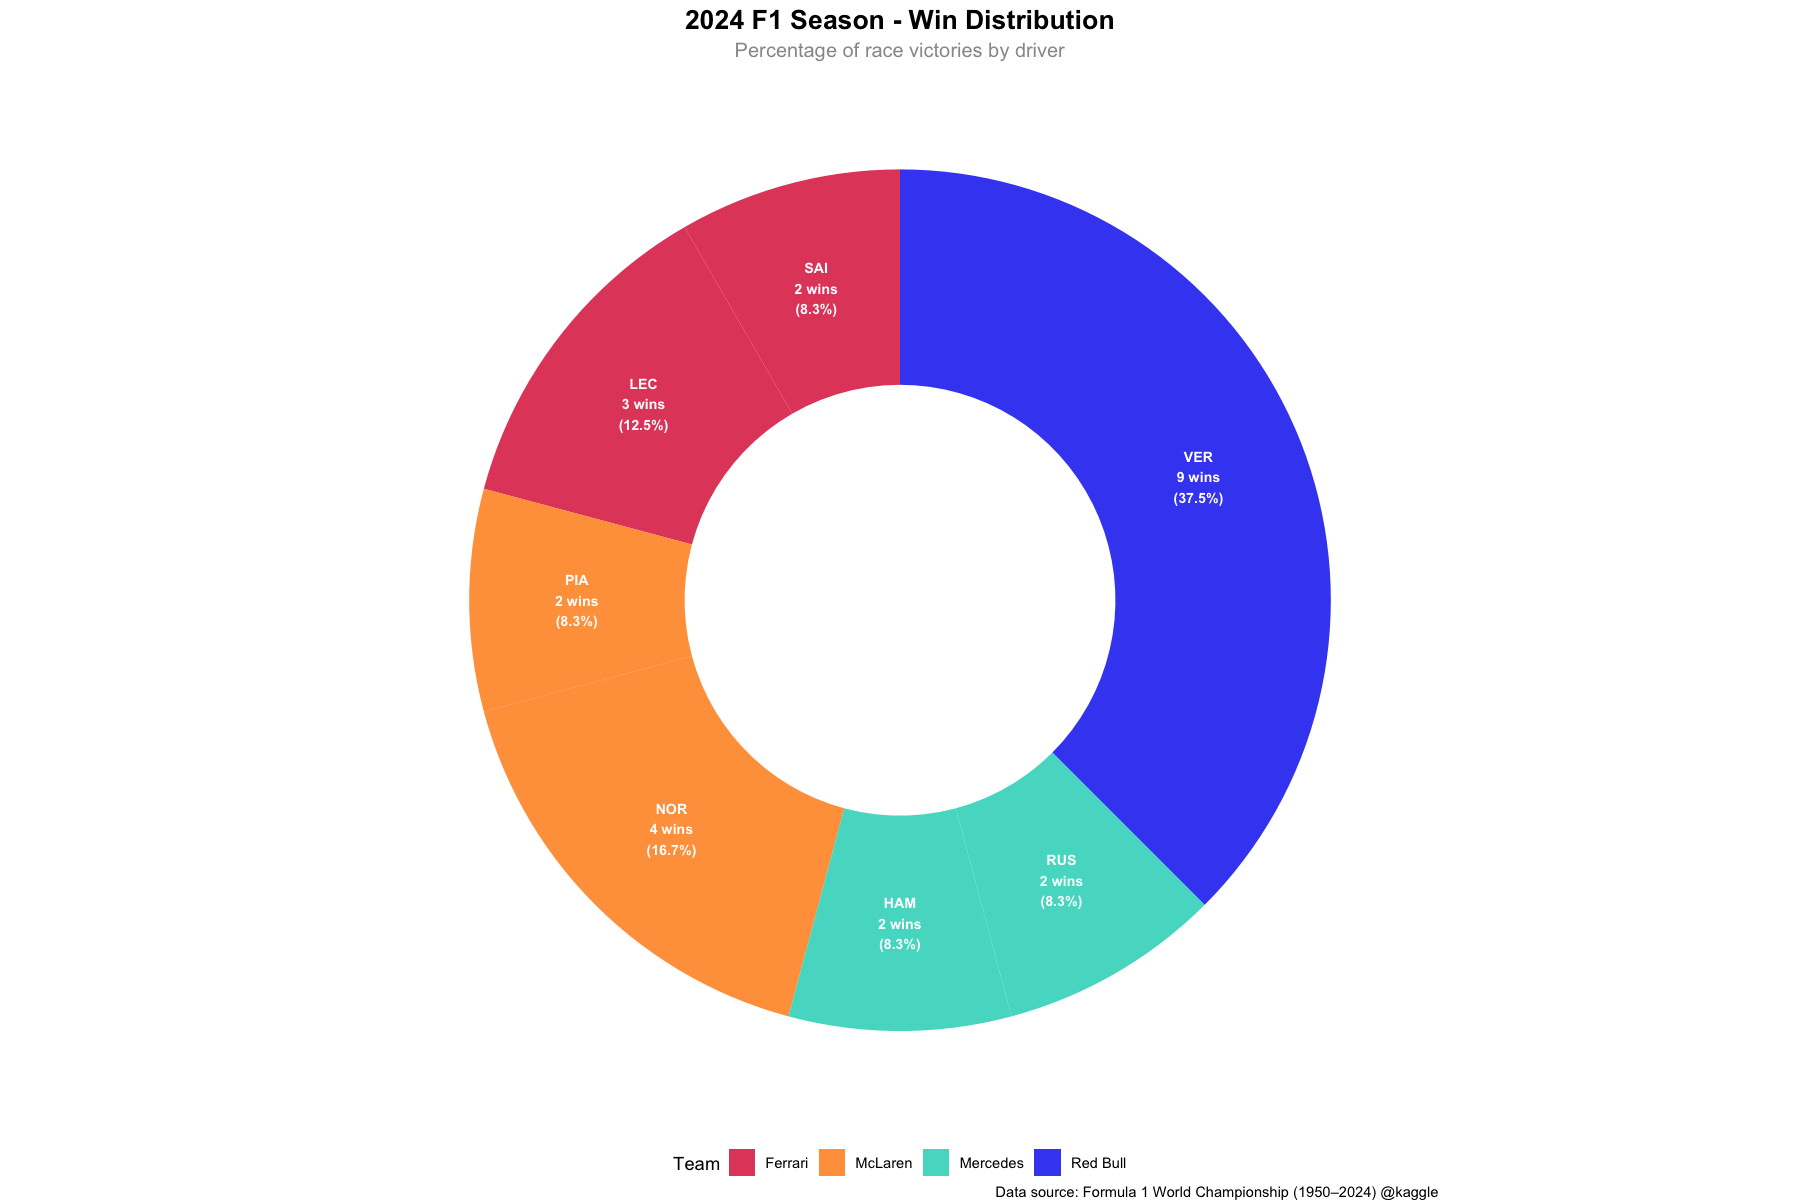

In [33]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(viridis)
library(scales)
library(lubridate)

# Complete 2024 F1 Season Race Winners Data
race_winners_2024 <- data.frame(
  race_number = 1:24,
  date = as.Date(c("2024-03-02", "2024-03-09", "2024-03-24", "2024-04-07", "2024-04-21", 
                   "2024-05-05", "2024-05-19", "2024-05-26", "2024-06-09", "2024-06-23", 
                   "2024-06-30", "2024-07-07", "2024-07-21", "2024-07-28", "2024-08-25", 
                   "2024-09-01", "2024-09-15", "2024-09-22", "2024-10-20", "2024-10-27", 
                   "2024-11-03", "2024-11-23", "2024-12-01", "2024-12-08")),
  grand_prix = c("Bahrain", "Saudi Arabia", "Australia", "Japan", "China", "Miami", 
                 "Emilia Romagna", "Monaco", "Canada", "Spain", "Austria", "British", 
                 "Hungarian", "Belgian", "Dutch", "Italian", "Azerbaijan", "Singapore", 
                 "United States", "Mexico", "Brazil", "Las Vegas", "Qatar", "Abu Dhabi"),
  winner = c("Max Verstappen", "Max Verstappen", "Carlos Sainz", "Max Verstappen", 
             "Max Verstappen", "Lando Norris", "Max Verstappen", "Charles Leclerc", 
             "Max Verstappen", "Max Verstappen", "George Russell", "Lewis Hamilton", 
             "Oscar Piastri", "Lewis Hamilton", "Lando Norris", "Charles Leclerc", 
             "Oscar Piastri", "Lando Norris", "Charles Leclerc", "Carlos Sainz", 
             "Max Verstappen", "George Russell", "Max Verstappen", "Lando Norris"),
  driver_code = c("VER", "VER", "SAI", "VER", "VER", "NOR", "VER", "LEC", "VER", "VER", 
                  "RUS", "HAM", "PIA", "HAM", "NOR", "LEC", "PIA", "NOR", "LEC", "SAI", 
                  "VER", "RUS", "VER", "NOR"),
  team = c("Red Bull", "Red Bull", "Ferrari", "Red Bull", "Red Bull", "McLaren", 
           "Red Bull", "Ferrari", "Red Bull", "Red Bull", "Mercedes", "Mercedes", 
           "McLaren", "Mercedes", "McLaren", "Ferrari", "McLaren", "McLaren", 
           "Ferrari", "Ferrari", "Red Bull", "Mercedes", "Red Bull", "McLaren")
)

# Create comprehensive championship data (estimated based on typical F1 scoring)
championship_data <- data.frame(
  driver = c("Max Verstappen", "Lando Norris", "Charles Leclerc", "Oscar Piastri", 
             "Carlos Sainz", "George Russell", "Lewis Hamilton", "Sergio Perez", 
             "Fernando Alonso", "Nico Hulkenberg", "Yuki Tsunoda", "Pierre Gasly", 
             "Lance Stroll", "Esteban Ocon", "Kevin Magnussen", "Alexander Albon", 
             "Daniel Ricciardo", "Oliver Bearman", "Franco Colapinto", "Liam Lawson"),
  driver_code = c("VER", "NOR", "LEC", "PIA", "SAI", "RUS", "HAM", "PER", "ALO", "HUL", 
                  "TSU", "GAS", "STR", "OCO", "MAG", "ALB", "RIC", "BEA", "COL", "LAW"),
  final_points = c(437, 374, 356, 292, 290, 245, 223, 152, 70, 37, 30, 26, 17, 14, 8, 6, 12, 7, 5, 4),
  team = c("Red Bull", "McLaren", "Ferrari", "McLaren", "Ferrari", "Mercedes", 
           "Mercedes", "Red Bull", "Aston Martin", "Haas", "RB", "Alpine", 
           "Aston Martin", "Alpine", "Haas", "Williams", "RB", "Ferrari", 
           "Williams", "RB")
)

# Team colors for consistency
team_colors <- c(
  "Red Bull" = "#0600EF", "McLaren" = "#FF8700", "Ferrari" = "#DC143C",
  "Mercedes" = "#00D2BE", "Aston Martin" = "#006F62", "Alpine" = "#0078D4",
  "Haas" = "#FFFFFF", "Williams" = "#005AFF", "RB" = "#6692FF"
)

# 1. RACE WINNERS BAR CHART
wins_summary <- race_winners_2024 %>%
  count(winner, driver_code, team) %>%
  arrange(desc(n))

wins_plot <- ggplot(wins_summary, aes(x = reorder(driver_code, n), y = n, fill = team)) +
  geom_col(width = 0.7, alpha = 0.8) +
  geom_text(aes(label = n), hjust = -0.2, fontface = "bold", size = 4) +
  scale_fill_manual(values = team_colors, name = "Team") +
  coord_flip() +
  labs(
    title = "2024 F1 Season - Race Wins by Driver",
    subtitle = "Total victories across 24 Grand Prix races",
    x = "Driver",
    y = "Number of Wins",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
    legend.position = "bottom",
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 12, face = "bold")
  )

print(wins_plot)

# # 2. SEASON PROGRESSION - RACE WINNERS OVER TIME
# timeline_plot <- ggplot(race_winners_2024, aes(x = race_number, y = 1, fill = team)) +
#   geom_col(width = 0.8, alpha = 0.8) +
#   geom_text(aes(label = driver_code), angle = 90, hjust = 0.5, vjust = 0.5, 
#             fontface = "bold", color = "white", size = 3) +
#   scale_fill_manual(values = team_colors, name = "Team") +
#   scale_x_continuous(breaks = 1:24, labels = race_winners_2024$grand_prix) +
#   labs(
#     title = "2024 F1 Season - Race Winners Timeline",
#     subtitle = "Chronological view of race winners throughout the season",
#     x = "Grand Prix",
#     y = "",
#     caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
#   ) +
#   theme_fivethirtyeight() +
#   theme(
#     plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
#     plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
#     axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
#     axis.text.y = element_blank(),
#     axis.ticks.y = element_blank(),
#     panel.grid = element_blank(),
#     legend.position = "bottom"
#   )

# print(timeline_plot)

# 3. CHAMPIONSHIP STANDINGS HEATMAP
# Top 15 drivers for better visualization
# top_drivers <- championship_data %>% 
#   slice_head(n = 15) %>%
#   mutate(
#     points_normalized = final_points / max(final_points),
#     position = row_number()
#   )

# championship_heatmap <- ggplot(top_drivers, aes(x = reorder(driver_code, -final_points), y = 1)) +
#   geom_tile(aes(fill = final_points), color = "white", size = 1, height = 0.8) +
#   geom_text(aes(label = paste0("P", position, "\n", final_points)), 
#             color = "white", fontface = "bold", size = 3.5) +
#   scale_fill_viridis_c(name = "Points", option = "plasma", direction = 1) +
#   labs(
#     title = "2024 F1 Drivers' Championship - Final Standings Heatmap",
#     subtitle = "Color intensity represents total championship points",
#     x = "Driver (ordered by championship position)",
#     y = "",
#     caption = "Data: Formula 1 2024 Season Final Standings"
#   ) +
#   theme_fivethirtyeight() +
#   theme(
#     plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
#     plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
#     axis.text.y = element_blank(),
#     axis.ticks.y = element_blank(),
#     panel.grid = element_blank(),
#     axis.text.x = element_text(angle = 0, hjust = 0.5, size = 10, face = "bold"),
#     legend.position = "bottom",
#     legend.key.width = unit(2, "cm")
#   )

# print(championship_heatmap)

# 4. TEAM PERFORMANCE AREA CHART
# team_summary <- championship_data %>%
#   group_by(team) %>%
#   summarise(
#     total_points = sum(final_points),
#     drivers = n(),
#     .groups = 'drop'
#   ) %>%
#   arrange(desc(total_points)) %>%
#   mutate(
#     cumulative_points = cumsum(total_points),
#     position = row_number()
#   )

# team_area_plot <- ggplot(team_summary, aes(x = reorder(team, -total_points), y = total_points, fill = team)) +
#   geom_col(alpha = 0.8, width = 0.7) +
#   geom_text(aes(label = total_points), vjust = -0.5, fontface = "bold", size = 3.5) +
#   scale_fill_manual(values = team_colors, guide = "none") +
#   labs(
#     title = "2024 F1 Constructors' Championship - Team Points",
#     subtitle = "Total points scored by each team across the season",
#     x = "Team",
#     y = "Championship Points",
#     caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
#   ) +
#   theme_fivethirtyeight() +
#   theme(
#     plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
#     plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
#     axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
#     panel.grid.minor = element_blank(),
#     axis.text = element_text(size = 10),
#     axis.title = element_text(size = 12, face = "bold")
#   )

# print(team_area_plot)

# 5. WIN DISTRIBUTION PIE CHART (converted to donut chart)
win_distribution <- wins_summary %>%
  mutate(
    percentage = round(n / sum(n) * 100, 1),
    label = paste0(driver_code, "\n", n, " wins\n(", percentage, "%)")
  )

donut_plot <- ggplot(win_distribution, aes(x = 2, y = n, fill = team)) +
  geom_col(width = 1, alpha = 0.8) +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), 
            fontface = "bold", size = 3, color = "white") +
  scale_fill_manual(values = team_colors, name = "Team") +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  labs(
    title = "2024 F1 Season - Win Distribution",
    subtitle = "Percentage of race victories by driver",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
    legend.position = "bottom",
    panel.border = element_blank(),        # Remove panel border
    plot.background = element_blank(),     # Remove plot background border
    panel.background = element_blank()     # Remove panel background border
  )


print(donut_plot)

# 6. SUMMARY STATISTICS
# cat("\n=== 2024 FORMULA 1 SEASON SUMMARY ===\n")
# cat("Total Races:", nrow(race_winners_2024), "\n")
# cat("Unique Race Winners:", length(unique(race_winners_2024$winner)), "\n")
# cat("Teams with Wins:", length(unique(race_winners_2024$team)), "\n\n")

# cat("DRIVERS' CHAMPIONSHIP:\n")
# for(i in 1:5) {
#   cat(paste0("  P", i, ": ", championship_data$driver[i], " (", championship_data$final_points[i], " points)\n"))
# }

# cat("\nCONSTRUCTORS' CHAMPIONSHIP:\n")
# for(i in 1:5) {
#   cat(paste0("  P", i, ": ", team_summary$team[i], " (", team_summary$total_points[i], " points)\n"))
# }

# cat("\nRACE WINS BREAKDOWN:\n")
# for(i in 1:nrow(wins_summary)) {
#   cat(paste0("  ", wins_summary$winner[i], ": ", wins_summary$n[i], " wins\n"))
# }

# Optional: Save all plots
ggsave("f1_2024_wins.png", wins_plot, width = 10, height = 8, dpi = 300)
# ggsave("f1_2024_timeline.png", timeline_plot, width = 14, height = 6, dpi = 300)
# ggsave("f1_2024_championship_heatmap.png", championship_heatmap, width = 14, height = 4, dpi = 300)
# ggsave("f1_2024_team_points.png", team_area_plot, width = 10, height = 6, dpi = 300)
ggsave("f1_2024_win_distribution.png", donut_plot, width = 8, height = 8, dpi = 300)